<a href="https://colab.research.google.com/github/abbeymars/AbigailMarsella-AER850Project3/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Masked image saved to: /content/drive/My Drive/AER850Proj3/masked_motherboard.jpg


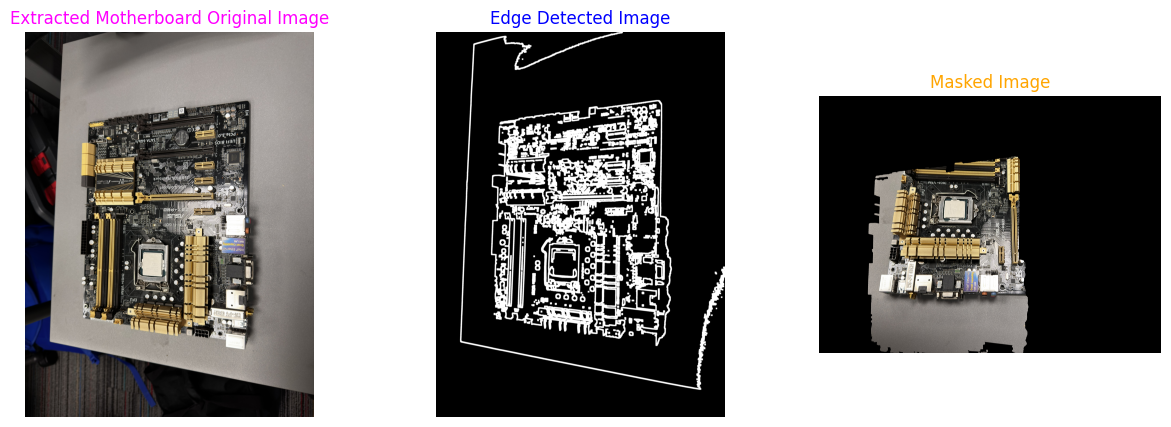

<Figure size 640x480 with 0 Axes>

In [11]:
from google.colab import files
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Object Masking
drive.mount('/content/drive') #mount google drive
#Step 1.1 Upload Image/Define Path
image_path = "/content/drive/My Drive/AER850Proj3/motherboard_image.JPEG"
image = cv2.imread(image_path)
image_real = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
#convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#reduce noise
image_blur = cv2.GaussianBlur(gray_image, (47, 47), 4)
#Thresholding
_, threshold_image = cv2.threshold(image_blur, 100, 255, cv2.THRESH_BINARY)
#Edge Detection, Canny Method
edge_detection = cv2.Canny(threshold_image, 100, 200)
edge_detection = cv2.dilate(edge_detection, None, iterations=10)
#Contour Detection
contour_detection, _ = cv2.findContours(edge_detection, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#Filter and highlight the largest contour
largest_contour = max(contour_detection, key=cv2.contourArea)
mask = np.zeros_like(image_real)
cv2.drawContours(mask, [largest_contour], -1, (255, 255, 255), thickness=cv2.FILLED)
#Isolate the motherboard
masked_image = cv2.bitwise_and(image_real, mask)
#Save this result
output_path = "/content/drive/My Drive/AER850Proj3/masked_motherboard.jpg"
cv2.imwrite(output_path, masked_image)
print(f"Masked image saved to: {output_path}")

plt.figure(figsize=(15, 5))
#Visualizing Original Image
plt.subplot(1, 3, 1)
plt.title("Extracted Motherboard Original Image", color='magenta')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
#Visualizing Edge Detected Image
plt.subplot(1, 3, 2)
plt.title("Edge Detected Image", color='blue')
plt.imshow(edge_detection, cmap='gray')
plt.axis("off")
#Visualizing Masked Image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title("Masked Image", color='orange')
plt.axis("off")
plt.show()

plt.tight_layout()
plt.show()
